In [1]:
import pandas as pd
import numpy as np

## 난수 발생을 위한 패키지
import random
## 그래프 표현을 위해 필요한 패키지
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# 한글 호환 문제
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumBarunGothic'

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.font_manager as fm

!sudo apt-get install -y fonts-nanum

# 폰트 캐시 재설정
!sudo fc-cache -fv

font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams['font.family'] = font_name

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 결측치 대체).csv', encoding='cp949')
df.set_index('동', drop=True, inplace=True)
df.head()

,연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,어린이집,CCTV,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,6.0,20200810.0,2020,8,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,3.0,20200921.0,2020,9,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,5.0,20200225.0,2020,2,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,4.0,20200210.0,2020,2,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,5.0,20200111.0,2020,1,0.0,0.0,7.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1594107 entries, 원효로2가 to 번동
Data columns (total 46 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   연식                         1594107 non-null  float64
 1   층                          1594107 non-null  float64
 2   계약일                        1594107 non-null  float64
 3   계약일(년)                     1594107 non-null  int64  
 4   계약일(월)                     1594107 non-null  int64  
 5   공원                         1594107 non-null  float64
 6   마트                         1594107 non-null  float64
 7   버스정류장                      1594107 non-null  float64
 8   어린이집                       1594107 non-null  float64
 9   CCTV                       1594107 non-null  float64
 10  스타벅스                       1594107 non-null  float64
 11  대학교                        1594107 non-null  float64
 12  병원                         1594107 non-null  float64
 13  지하철               

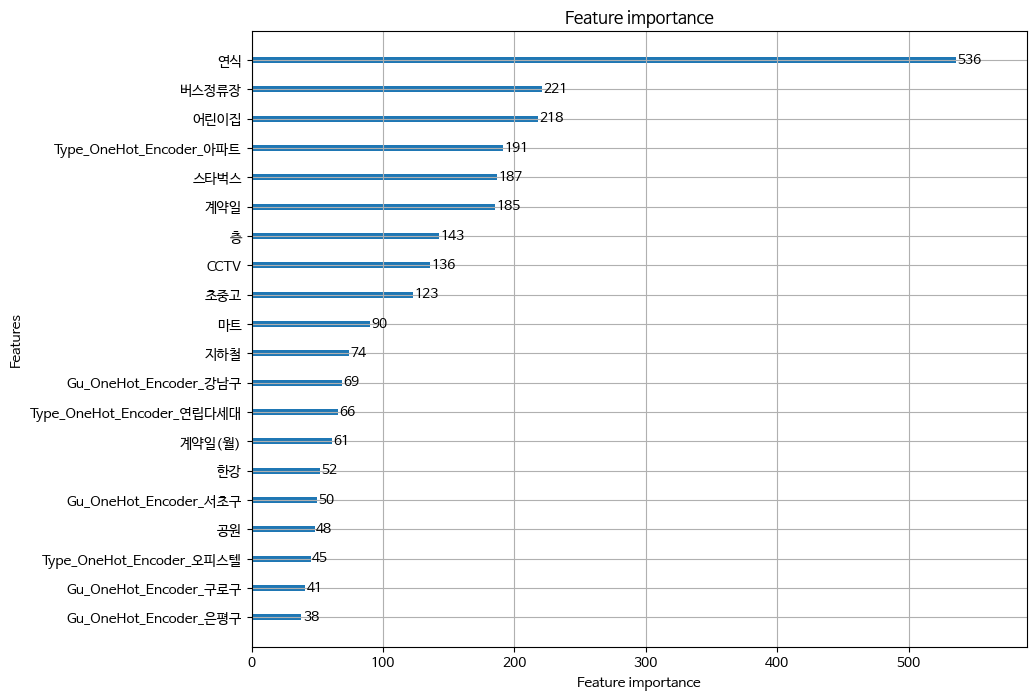

In [6]:
# lightgbm 학습
from lightgbm import LGBMRegressor
import lightgbm as lgb

X_features = df.iloc[:, :-1]
y_label = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

model = LGBMRegressor(max_depth=10, random_state=11, verbose=-1)
model.fit(X_train, y_train)

lgb.plot_importance(model, figsize=(10, 8), max_num_features=20)
plt.show()

Mean Absolute Error: 430.0425243124289
Mean Squared Error: 365121.11287605524
Root Mean Squared Error: 604.2525240957254
Mean Squared Log Error: 0.14047562891206394
R Squared: 0.6569062914887078
Mean Absolute Percentage Error: 32.37327255818529
Mean Percentage Error: -16.2324439626397
              실제값          예측값
동                             
가락동   2546.879958  2521.956900
가리봉동  1642.625283  1580.996348
가산동   2438.044269  2490.585168
가양동   1941.416840  1948.118755
가회동   1722.827903  1357.731832
...           ...          ...
효창동   2430.199235  2349.710223
후암동   1625.261842  1635.271024
휘경동   1872.946527  1782.083590
흑석동   2183.732827  2286.996646
흥인동   3024.263098  3169.969348

[394 rows x 2 columns]


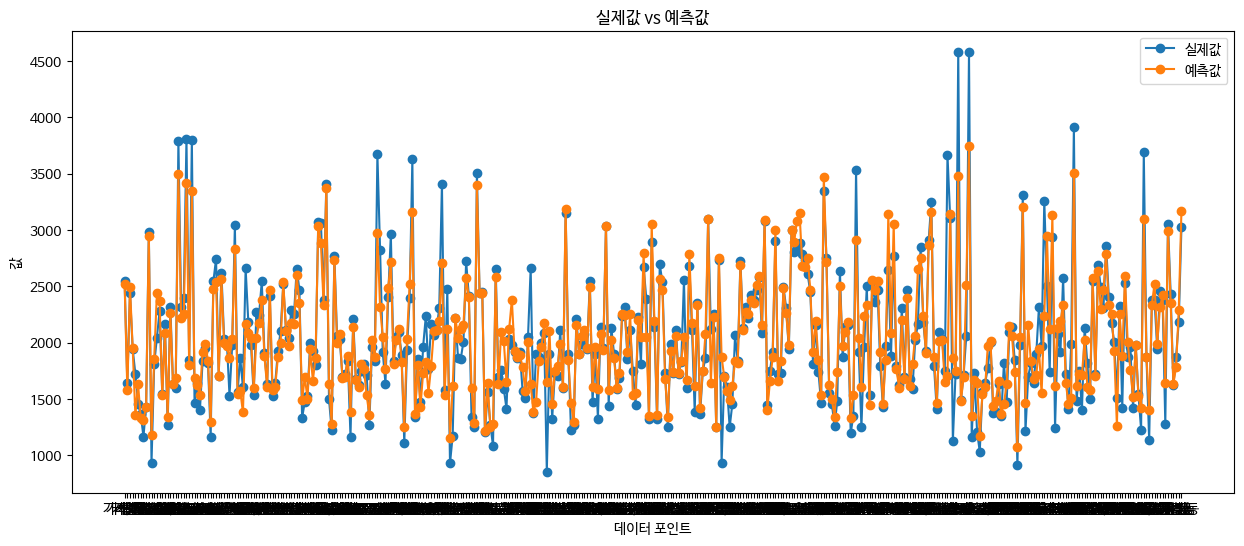

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

# 학습된 모델을 사용하여 예측
y_pred = model.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(15, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()

In [8]:
# # RandomizedSearchCV(하이퍼파라미터 튜닝)
# from sklearn.model_selection import RandomizedSearchCV

# params = {
#     'n_estimators' : [100, 500 , 1000] , # 반복 횟수
#     'learning_rate' : [0.01 , 0.05 , 0.1 , 0.3] , # 러닝 메이트
#     'lambda_l1' : [0 , 10 , 20 , 30 ,50] , # L1 정규화
#     'lambda_l2' : [0 , 10 , 20 , 30 , 50] , # L2 정규화
#     'max_depth' : [5 , 10 , 15 , 20] , # 최대 깊이
#     'subsample' : [0.6 , 0.8 , 1] # 서브샘플 비율
# }

# model_2 = LGBMRegressor(random_state= 11) # 모델 객체 생성
# rs = RandomizedSearchCV(model_2 , param_distributions= params , n_iter= 30, random_state= 11 , n_jobs= -1) # 랜덤 그리드 서치 객체 생성
# rs.fit(X_train , y_train)
# rs.best_params_

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.144740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 869
[LightGBM] [Info] Number of data points in the train set: 1275285, number o

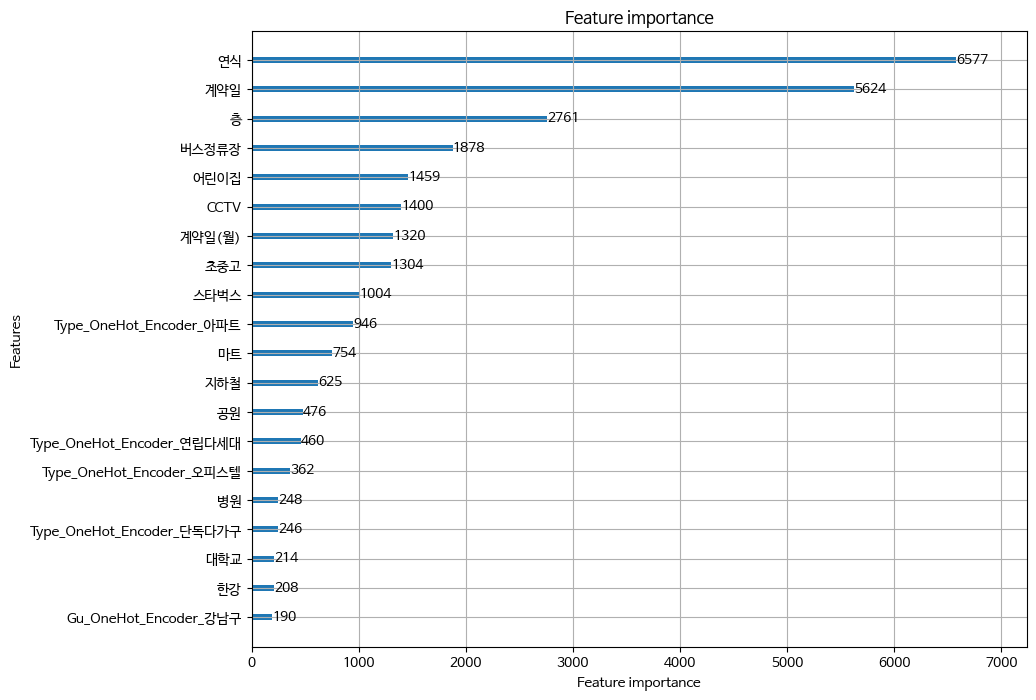

In [9]:
# 최적화된 하이퍼파라미터 적용
model_best = LGBMRegressor(n_estimators=1000,
                          learning_rate=0.3,
                          lambda_l1=10,
                          lambda_l2=30,
                          max_depth=20,
                          subsample=0.6,
                          random_state=11)
model_best.fit(X_train, y_train)

lgb.plot_importance(model_best, figsize=(10, 8), max_num_features=20)
plt.show()

[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Mean Absolute Error: 383.2751317869899
Mean Squared Error: 293889.1410828053
Root Mean Squared Error: 542.1154315114128
Mean Squared Log Error: 0.12017911659499583
R Squared: 0.723840907168996
Mean Absolute Percentage Error: 28.83706432984146
Mean Percentage Error: -13.654235763906101
              실제값          예측값
동                             
가락동   2546.879958  2562.209085
가리봉동  1642.625283  1603.240752
가산동   2438.044269  2433.329814
가양동   1941.416840  1936.807295
가회동   1722.827903  1488.510068
...           ...          ...
효창동   2430.199235  2450.269178
후암동   1625.261842  1626.858034
휘경동   1872.946527  1865.739673
흑석동   2183.732827  2261.734981
흥인동   302

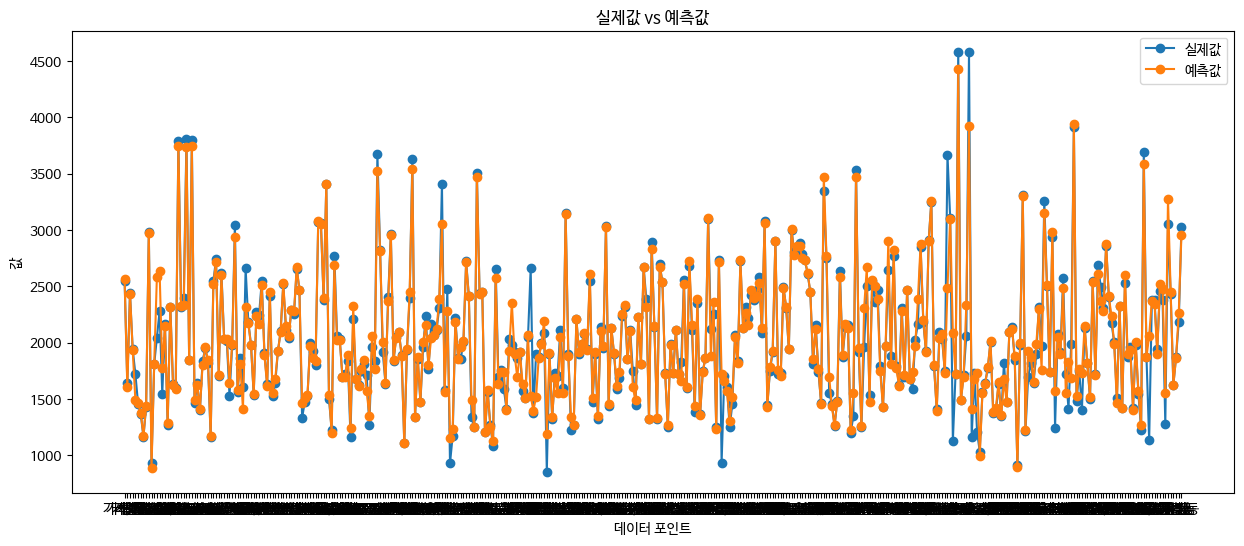

In [10]:
# 학습된 모델을 사용하여 예측
y_pred = model_best.predict(X_test)

# 예측값과 실제값 비교 및 성능 측정
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
msle = mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mpe = np.mean((y_test - y_pred) / y_test) * 100


print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Squared Log Error: {msle}')
print(f'R Squared: {r2}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'Mean Percentage Error: {mpe}')

# 예측값과 실제값 비교를 위한 데이터프레임 생성
compare_df = pd.DataFrame({'실제값': y_test, '예측값': y_pred})
compare_df['실제값'] = pd.to_numeric(compare_df['실제값'], errors='coerce')
compare_df['예측값'] = pd.to_numeric(compare_df['예측값'], errors='coerce')
compare_df = compare_df.groupby('동').mean()

print(compare_df)

# 예측값과 실제값 비교하는 선 그래프
plt.figure(figsize=(15, 6))
plt.plot(compare_df['실제값'], label='실제값', marker='o')
plt.plot(compare_df['예측값'], label='예측값', marker='o')
plt.title('실제값 vs 예측값')
plt.xlabel('데이터 포인트')
plt.ylabel('값')
plt.legend()
plt.show()